#  目录
一. 图是什么？
二. 如何存储图？
三. 图的类型和性质
四. 主要的图算法
五. 图机器学习的发展

# 一. 图是什么？
首先我们导入需要的包

In [1]:
import numpy as np
import random
import networkx as nx  # 用Python语言开发的图论与复杂网络建模工具,内置了常用的图与复杂网络分析算法,可以方便的进行复杂网络数据分析、仿真建模等工作
from IPython.display import Image
import matplotlib.pyplot as plt

## 图的定义
图表示物件与物件之间的关系的数学对象，是图论的基本研究对象。

举个例子，一个简单的图可能是这样：

![](https://ai-studio-static-online.cdn.bcebos.com/c775b3d2b9474e9590ef0cf80c0c2a9a1b6b1f7712a44888b3de14f29a1ee232)

节点（node）用红色标出，通过黑色的边（edge）连接。

图可用于表示:
- 社交网络
- 网页
- 生物网络
- …

我们可以在图上执行怎样的分析？
- 研究拓扑结构和连接性
- 群体检测
- 识别中心节点
- 预测缺失的节点
- 预测缺失的边
- …

我们首先在我们的笔记本中导入第一个预构建的图：

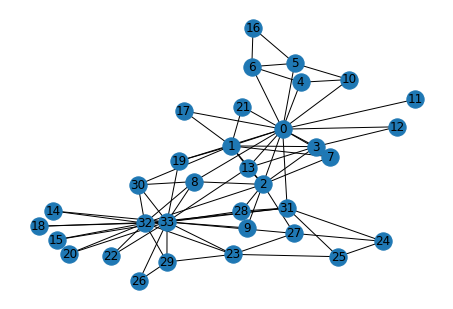

In [2]:
# Load the graph
G_karate = nx.karate_club_graph()  #返回Zachary的空手道俱乐部图
# Find key-values for the graph
pos = nx.spring_layout(G_karate) # 指定布局
# Plot the graph
nx.draw(G_karate, cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos) # 画图

# 空手道俱乐部图背景略，有兴趣的自己查一下，这里仅仅为了做一个演示

## 图的基本表示方法
- 图 G=(V, E) 由下列要素构成：
- 一组节点（也称为 verticle）V=1,…,n
- 一组边 E⊆V×V
- 边 (i,j) ∈ E 连接了节点 i 和 j
- i 和 j 被称为相邻节点（neighbor）
- 节点的度（degree）是指相邻节点的数量

![](https://ai-studio-static-online.cdn.bcebos.com/a5d3abb1585744c9be0c590d8839c5e12fac5a5842664dc195edb07594349b06)

上图为节点、边和度的示意图


- 如果一个图的所有节点都有 n-1 个相邻节点，则该**图是完备的**（complete）。也就是说所有节点都具备所有可能的连接方式。
- **从 i 到 j 的路径**（path）是指从 i 到达 j 的边的序列。该路径的长度（length）等于所经过的边的数量。
- **图的直径**（diameter）是指连接任意两个节点的所有最短路径中最长路径的长度。

举个例子，在这个案例中，我们可以计算出一些连接任意两个节点的最短路径。该图的直径为 3，因为没有任意两个节点之间的最短路径的长度超过 3。
![](https://ai-studio-static-online.cdn.bcebos.com/3e981b869bd145fd9f2068cdc18a4b111755704e7bd84237b98168962c450c0a)

上图为一个直径为 3 的图


**测地路径**（geodesic path）是指两个节点之间的最短路径。
如果所有节点都可通过某个路径连接到彼此，则它们构成一个**连通分支**（connected component）。如果一个图仅有一个连通分支，则该**图是连通的**（connected）

举个例子，下面是一个有两个不同连通分支的图：
!()[https://ai-studio-static-online.cdn.bcebos.com/f85fcde3aa554668958c6007098d8c63471d49d805ed4a168b178bd71719906e]

如果一个图的边是有顺序的配对，则该**图是有向的**（directed）。i 的**入度**（in-degree）是指向 i 的边的数量，**出度**（out-degree）是远离 i 的边的数量
![](https://ai-studio-static-online.cdn.bcebos.com/a3d35b6ae2b74a8eb390e2514e7e9b814c70eba9599c4551877a8b00650285a1)

如果可以回到一个给定节点，则该**图是有环的**（cyclic）。相对地，如果至少有一个节点无法回到，则该**图就是无环的**（acyclic）。
图可以被**加权**（weighted），即在节点或关系上施加权重。
如果一个图的边数量相比于节点数量较小，则该**图是稀疏的**（sparse）。相对地，如果节点之间的边非常多，则该**图是密集的**（dense）

Neo4J 的关于图算法的书给出了清晰明了的总结：

![](https://ai-studio-static-online.cdn.bcebos.com/a9c5e49e30034ed6ade09147a8edc62cc6ff1eab8c054d77b8eb063f98d262a5)

回到我们的空手道俱乐部图

In [3]:
# .degree() 属性会返回该图的每个节点的度（相邻节点的数量）的列表：
n=34
print(G_karate.degree())
degree_sequence = list(G_karate.degree())

[(0, 16), (1, 9), (2, 10), (3, 6), (4, 3), (5, 4), (6, 4), (7, 4), (8, 5), (9, 2), (10, 3), (11, 1), (12, 2), (13, 5), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 3), (20, 2), (21, 2), (22, 2), (23, 5), (24, 3), (25, 3), (26, 2), (27, 4), (28, 3), (29, 4), (30, 4), (31, 6), (32, 12), (33, 17)]


In [4]:
# 计算边的数量，但也计算度序列的度量：
nb_nodes = n
nb_arr = len(G_karate.edges())
avg_degree = np.mean(np.array(degree_sequence)[:,1])
med_degree = np.median(np.array(degree_sequence)[:,1])# 中位数
max_degree = max(np.array(degree_sequence)[:,1])
min_degree = np.min(np.array(degree_sequence)[:,1])
# 最后，打印所有信息：
print("Number of nodes : " + str(nb_nodes))
print("Number of edges : " + str(nb_arr))
print("Maximum degree : " + str(max_degree))
print("Minimum degree : " + str(min_degree))
print("Average degree : " + str(avg_degree))
print("Median degree : " + str(med_degree))

Number of nodes : 34
Number of edges : 78
Maximum degree : 17
Minimum degree : 1
Average degree : 4.588235294117647
Median degree : 3.0


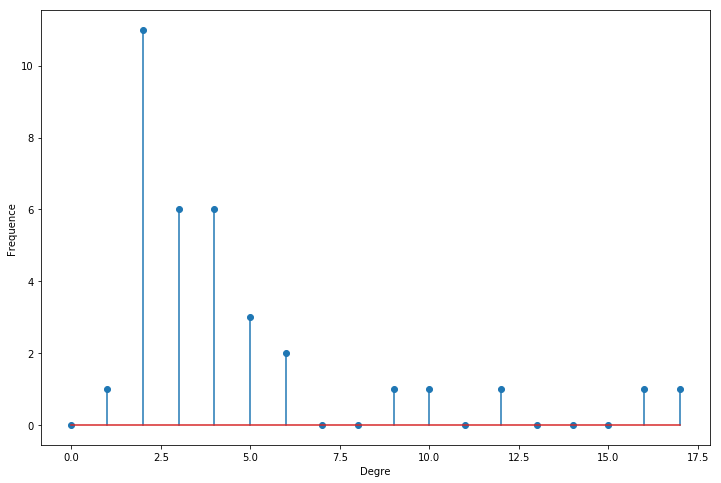

In [5]:
# 平均而言，该图中的每个人都连接了 4.6 个人。
# 我们可以绘出这些度的直方图：
degree_freq = np.array(nx.degree_histogram(G_karate)).astype('float')
plt.figure(figsize=(12, 8))
plt.stem(degree_freq)
plt.ylabel("Frequence")
plt.xlabel("Degre")
plt.show()

我们后面会看到，度的直方图相当重要，可用于确定我们看到的图的种类。

# 二. 如何存储图？
存储图的方式有三种，取决于你想用它做什么：

- **存储为边列表**：

1 2

1 3

1 4

2 3

3 4

...

我们存储有边连接的每一对节点的 ID，例如：
```
G_karate.edges()
```

- **使用邻接矩阵**，这通常是在内存中加载的方式：

对于图中的每一个可能的配对，如果两个节点有边相连，则设为 1。如果该图是无向图，则 A 是对称的。

![](https://ai-studio-static-online.cdn.bcebos.com/2b34d2e63e2743709e2bba2ec869034a15131b1104134bf697ed030856a1a634)

- **使用邻接列表**：

1 ：[2, 3, 4]

2 ：[1,3]

3 ：[2, 4]

...

这三种表示方式都是等价的，我们可以根据使用场景来选择图的存储方式。

# 三. 图的类型和性质

图可以根据不同标准进行分类，我们在这里主要讲一种分类方法，同构图与异构图。了解更多可以查看 图论（二）--各种图介绍

**PS:这里推荐自己找，给的参考博客质量不佳**

- 同构图与异构图

两个图G和H是同构图（isomorphic graphs），能够通过重新标记图G的顶点而产生图H。

如果G和H同构，那么它们的阶是相同的，它们大小是相同的，它们个顶点的度数也对应相同。

异构图是一个与同构图相对应的新概念。

**传统同构图（Homogeneous Graph）数据中只存在一种节点和边，因此在构建图神经网络时所有节点共享同样的模型参数并且拥有同样维度的特征空间。**

**而异构图（Heterogeneous Graph）中可以存在不只一种节点和边，因此允许不同类型的节点拥有不同维度的特征或属性。**

推荐文章：

[DGL更新报告：异构图神经网络](https://www.jiqizhixin.com/articles/2019-10-14-5)

# 四. 主要的图算法

目前大多数框架（比如 Python 的 networkx 或 Neo4J）支持的图算法类别主要有三个：

- Pathfinding（寻路）：根据可用性和质量等条件确定最优路径。我们也将搜索算法包含在这一类别中。这可用于确定最快路由或流量路由。
- Centrality（中心性）：确定网络中节点的重要性。这可用于识别社交网络中有影响力的人或识别网络中潜在的攻击目标。
- Community detection（社群检测）：评估群体聚类的方式。这可用于划分客户或检测欺诈等。

networkx 中的所有算法都可在这里找到：

https://networkx.github.io/documentation/stable/reference/algorithms/index.html

我们只会介绍 networkx 中实现的最常见的基本算法。

## 1. 寻路和图搜索算法

寻路算法是通过最小化跳（hop）的数量来寻找两个节点之间的最短路径。

搜索算法不是给出最短路径，而是根据图的相邻情况或深度来探索图。这可用于信息检索。

1). 搜索算法

图搜索算法主要有两种：

宽度优先搜索（BFS）：首先探索每个节点的相邻节点，然后探索相邻节点的相邻节点；
深度优先搜索（DFS）：会尝试尽可能地深入一条路径，如有可能便访问新的相邻节点。

![](https://ai-studio-static-online.cdn.bcebos.com/a70fac9366e1403f9f9d105ec7445f4cd2d01cf8a6114ab680aa895c7f0b2855)

2). 寻路算法

a. 最短路径

> 最短路径计算的是一对节点之间的最短的加权（如果图有加权的话）路径。

这可用于确定最优的驾驶方向或社交网络上两个人之间的分离程度。

计算图中的最短路径的方法有很多，包括 Dijkstra 算法，这是 networkx 中的默认算法。更多有关最短路径问题的介绍请参阅：https://en.wikipedia.org/wiki/Shortest_path_problem

用空手道俱乐部图举例

{0: [0], 1: [0, 1], 2: [0, 2], 3: [0, 3], 4: [0, 4], 5: [0, 5], 6: [0, 6], 7: [0, 7], 8: [0, 8], 10: [0, 10], 11: [0, 11], 12: [0, 12], 13: [0, 13], 17: [0, 17], 19: [0, 19], 21: [0, 21], 31: [0, 31], 30: [0, 1, 30], 9: [0, 2, 9], 27: [0, 2, 27], 28: [0, 2, 28], 32: [0, 2, 32], 16: [0, 5, 16], 33: [0, 8, 33], 24: [0, 31, 24], 25: [0, 31, 25], 23: [0, 2, 27, 23], 14: [0, 2, 32, 14], 15: [0, 2, 32, 15], 18: [0, 2, 32, 18], 20: [0, 2, 32, 20], 22: [0, 2, 32, 22], 29: [0, 2, 32, 29], 26: [0, 8, 33, 26]}


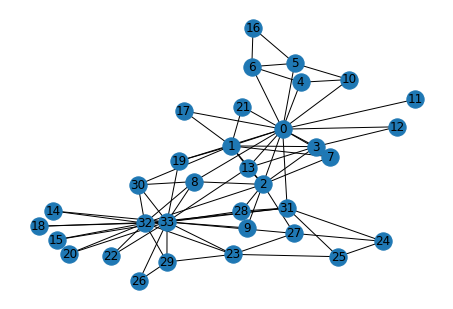

In [6]:
nx.draw(G_karate, cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos)
# 这会返回图中每个节点之间的最小路径的列表：
all_shortest_path = nx.shortest_path(G_karate)
# 这里打印了节点0与其余节点的最短路径
print(all_shortest_path[0])
# 例如节点0与节点26的最短路径是[0, 8, 33, 26]

b. 单源最短路径

> 单源最短路径（Single Source Shortest Path/SSSP）是找到给定节点与图中其它所有节点之间的最短路径。

这常用于 IP 网络的路由协议。

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31, 30, 9, 27, 28, 32, 16, 33, 24, 25, 23, 14, 15, 18, 20, 22, 29, 26]


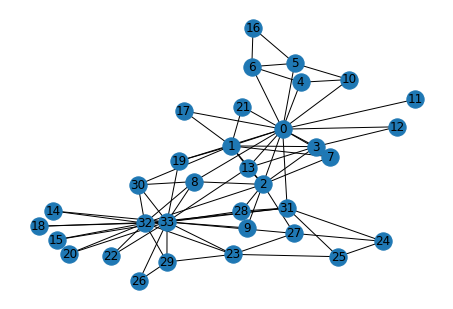

In [7]:

nx.draw(G_karate, cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos)
# 返回对给定节点（源头）0与图中其他节点的最短路径
print(list(nx.single_source_shortest_path(G_karate, source=0)))

c. 所有配对最短路径

> 所有配对最短路径（All Pairs Shortest Path / APSP）算法是找到所有节点对之间的最短路径。

尽管能够提供相近的结果，但这比为每个节点对调用单源最短路径算法更快。该算法通常可用于确定交通网格的不同分区的流量负载。

(0, {0: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 10: 1, 11: 1, 12: 1, 13: 1, 17: 1, 19: 1, 21: 1, 31: 1, 30: 2, 9: 2, 27: 2, 28: 2, 32: 2, 16: 2, 33: 2, 24: 2, 25: 2, 23: 3, 14: 3, 15: 3, 18: 3, 20: 3, 22: 3, 29: 3, 26: 3})


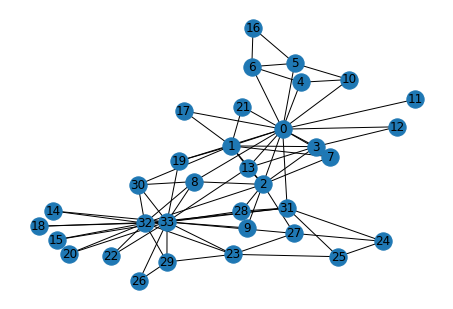

In [8]:
nx.draw(G_karate, cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos)
# 返回所有配对最短路径
all_path_length = list(nx.all_pairs_shortest_path_length(G_karate))
print(all_path_length[0])

d. 最小权重生成树

> 最小权重生成树（minimum spanning tree）是图（一个树）的一个子图，其用权重和最小的边连接了图中的所有节点。

注意，最小生成树应该用于无向图。

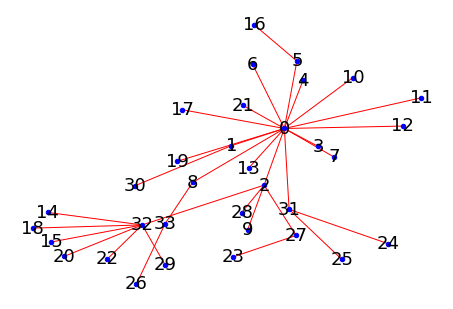

In [9]:
from networkx.algorithms import tree
mst = tree.minimum_spanning_edges(G_karate, algorithm='prim', data=False)
edgelist = list(mst)
edgelist = sorted(edgelist)
G = nx.Graph()#创建空的网络图
G.add_edges_from(edgelist)
plt.figure()
nx.draw(G,pos = pos, node_color = 'b',edge_color = 'r',with_labels = True,font_size =18, node_size =20)

## 2. 社群检测

> 社群检测是根据给定的质量指标将节点划分为多个分组。

这通常可用于识别社交社群、客户行为或网页主题。 社区是指一组相连节点的集合。但是，目前关于社群还没有广泛公认的定义，只是社群内的节点应该要密集地相连。

![](https://ai-studio-static-online.cdn.bcebos.com/2669fb0fd59f4a8bbaa4348b3ac61ade504a0dbf5a5341dba5006f3f727f7363)

Girvan Newman 算法是一个用于发现社群的常用算法。其通过逐步移除网络内的边来定义社区。我们将居间性称为「边居间性（edge betweenness）」。这是一个正比于穿过该边的节点对之间最短路径的数量的值。

该算法的步骤如下：

1. 计算网络中所有已有边的居间性。
1. 移除居间性最高的边。
1. 移除该边后，重新计算所有边的居间性。
1. 重复步骤 2 和 3，直到不再剩余边。

In [10]:
from networkx.algorithms import community
import itertools
k = 1
comp = community.girvan_newman(G_karate)
for communities in itertools.islice(comp, k):
    print(tuple(sorted(c) for c in communities))

([0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])


## 3. 分层聚类
在分层聚类（hierarchical clustering）中，我们构建聚类的层次结构。我们用树状图的形式表示聚类。

![](https://ai-studio-static-online.cdn.bcebos.com/fd0a3e699b7949fd939b81d060dfcabc2f971794ffce4bed888d81db262e916b)

其思想是以不同的规模分析社群结构。我们通常自下而上构建树状图。我们从每个节点一个聚类开始，然后合并两个「最近」的节点。

但我们如何衡量聚类是否相近呢？我们使用相似度距离。令 d(i,j) 为 i 和 j 之间的最短路径的长度。

![](https://ai-studio-static-online.cdn.bcebos.com/079fcad9a2eb4b2da53fd9ef1e2168a6720c60f69b1a4d9abcec5544f2a8de8a)

要得到最大连接，在每个步骤，被最短距离分开的两个聚类被组合到一起。相似度距离可用以下示意图阐释

![](https://ai-studio-static-online.cdn.bcebos.com/96bc1b02dd99436fb72bff1472d82b8a05e949ab3b4b420898e62c17c93bf086)

下面回到我们的空手道示例。在应用分层聚类之前，我们需要定义每个节点之间的距离矩阵。

In [11]:
pcc_longueurs=list(nx.all_pairs_shortest_path_length(G_karate))
distances=np.zeros((n,n))# distances[i, j] is the length of the shortest path between i and j
for i in range(n):
    for j in range(n):
        distances[i, j] = pcc_longueurs[i][1][j]

现在，我们将使用 sklearn 的 AgglomerativeClustering 函数来确定分层聚类。

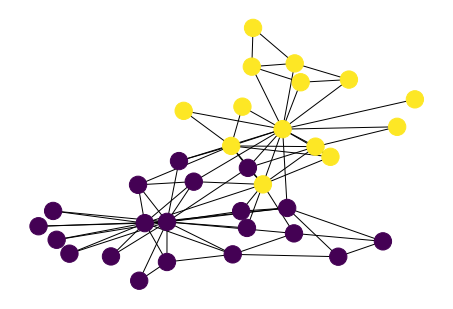

In [12]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(distances)
# 最后，根据聚类结果，用不同颜色绘出所得到的图：
G.add_edges_from(edgelist)
plt.figure()
nx.draw(G_karate,  node_color = clustering, pos=pos)